#### Building a Neural Network from Scratch
    https://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/

In [29]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
dataset = fetch_openml('mnist_784')
X, y = dataset["data"], dataset["target"]

In [17]:
X = X / 255 #normalize data (0-1)

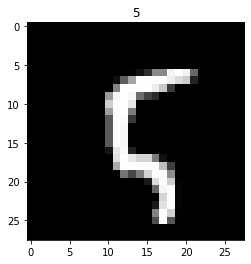

In [18]:
i = 100
img_1 = X[i,:].reshape(28,28)
plt.title(y[i])
plt.imshow(img_1, cmap="gray")

In [19]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [20]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [21]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

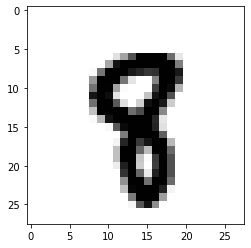

[0.]


In [24]:
i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.show()
print(y_train[:,i])

In [25]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [33]:
epsilon = 1e-5  
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat + epsilon),Y) ) + np.sum( np.multiply(np.log(1-Y_hat+epsilon),(1-Y)) ) )

    return L

In [34]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6678466483279449
Epoch 100 cost:  7.841634800978119e-06
Epoch 200 cost:  7.52880086173291e-06
Epoch 300 cost:  7.227563874436586e-06
Epoch 400 cost:  6.937273663068638e-06
Epoch 500 cost:  6.657328388224844e-06
Epoch 600 cost:  6.387170103988587e-06
Epoch 700 cost:  6.126280798349649e-06
Epoch 800 cost:  5.874178856681571e-06
Epoch 900 cost:  5.630415896284566e-06
Epoch 1000 cost:  5.394573927211687e-06
Epoch 1100 cost:  5.166262800679409e-06
Epoch 1200 cost:  4.945117911517748e-06
Epoch 1300 cost:  4.730798125550182e-06
Epoch 1400 cost:  4.522983906537196e-06
Epoch 1500 cost:  4.321375620535509e-06
Epoch 1600 cost:  4.125691998323687e-06
Epoch 1700 cost:  3.935668738892562e-06
Epoch 1800 cost:  3.7510572390942082e-06
Epoch 1900 cost:  3.57162343628324e-06
Final cost: 3.398867674578772e-06


In [37]:
y_test[0,100] = 1.0

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))


[[9999    1]
 [   0    0]]


In [39]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000
        True       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



/opt/anaconda/2020.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
